# **M508 Final Project for Big Data Analytics**
Name : Dipanshu Singh || Student ID : GH1035704
--

#1. Introdution
---
##1.1 Business Problem : Genre Ambiguity and Overlap in Spotify's Music Categorization
- Why are we doing it?

  - Currently we are seeing there are some overlaping in across Genres. Certain genres share similar audio characteristics, making classification challenging. For instance, genres like pop, EDM, and rap often exhibit overlapping features such as tempo, danceability, and speechiness.
  Genres with stylistic similarities and overlap, such as rock and country, pose significant challenges for machine learning models in accurately classifying them.

- How can we resolve this?

  - Suggested, if we merge both lyrics based and accoustic data to get the new geners.

- What imapct we will make after implementing this?

 -  This new apprach could give birth to new genres and for useres we will be able to give more diverse recommendation.


(Li et al., 2023)
Li, You, et al. “Music Genre Classification Based on Fusing Audio and Lyric Information.” Multimedia Tools and Applications, 29 Dec. 2022, https://doi.org/10.1007/s11042-022-14252-6. Accessed 21 Mar. 2023.

In [ ]:
#@title ####**Installing essential libraries**
!pip install unidecode
!pip install spacy
!pip install nltk
!pip install gensim
!pip install hdbscan
!pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 115.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version 

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
#@title ####**Loading & Importing essential libraries**
# Essential Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

# NLP Libraries
import spacy
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode
from gensim.models import Word2Vec

# Sklearn Libraries
from sklearn.cluster import KMeans
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Downloading necessary nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize SpaCy English Model
nlp = spacy.load('en_core_web_sm')

# Initialize NLP Tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


###**Step 1️⃣ : Data Collection**

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d saurabhshahane/music-dataset-1950-to-2019

import zipfile

with zipfile.ZipFile('music-dataset-1950-to-2019.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/9.73M [00:00<?, ?B/s]
100% 9.73M/9.73M [00:00<00:00, 1.13GB/s]


###**Stage 2️⃣ : Data Exploration & Description**

In [ ]:
df_main = pd.read_csv('tcc_ceds_music.csv')
pd.set_option('display.max_columns', None)
print("\033[1mBasic Data Loading with Columns and Rows Size\033[0m\n")
print(f"Total Rows : {df_main.shape[0]} \tTotal Columns : {df_main.shape[1]} \tTotal Cells : {df_main.size} \n","- "*175)
df_main.head()

Basic Data Loading with Columns and Rows Size

Total Rows : 28372 	Total Columns : 31 	Total Cells : 879532 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
print("Basic Statistical Analysis")
df_main.describe(include="all").T

Basic Statistical Analysis


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,28372.0,NaN,NaN,NaN,42946.323558,24749.325492,0.0,20391.25,45405.5,64090.5,82451.0
artist_name,28372,5426,johnny cash,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,28372,23689,tonight,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,28372.0,NaN,NaN,NaN,1990.236888,18.487463,1950.0,1975.0,1991.0,2007.0,2019.0
genre,28372,7,pop,7042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lyrics,28372,28372,remix killer alive remix thriller trap bitch s...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
len,28372.0,NaN,NaN,NaN,73.028444,41.829831,1.0,42.0,63.0,93.0,199.0
dating,28372.0,NaN,NaN,NaN,0.021112,0.05237,0.000291,0.000923,0.001462,0.004049,0.647706
violence,28372.0,NaN,NaN,NaN,0.118396,0.178684,0.000284,0.00112,0.002506,0.192608,0.981781
world/life,28372.0,NaN,NaN,NaN,0.120973,0.1722,0.000291,0.00117,0.006579,0.197793,0.962105


In [ ]:
print("Basic Column Data Type Analysis")
df_main.dtypes.T

Basic Column Data Type Analysis


,0
Unnamed: 0,int64
artist_name,object
track_name,object
release_date,int64
genre,object
lyrics,object
len,int64
dating,float64
violence,float64
world/life,float64


In [ ]:
print(f"Total Nulls :{df_main.isnull().sum().sum()}")
print(f"- "*10,"\nDetailed Row Wise View\n")
df_main.isnull().sum()

Total Nulls :0
- - - - - - - - - -  
Detailed Row Wise View



,0
Unnamed: 0,0
artist_name,0
track_name,0
release_date,0
genre,0
lyrics,0
len,0
dating,0
violence,0
world/life,0


In [ ]:
print(f"Total Duplicates :{df_main.duplicated().sum()}")

Total Duplicates :0


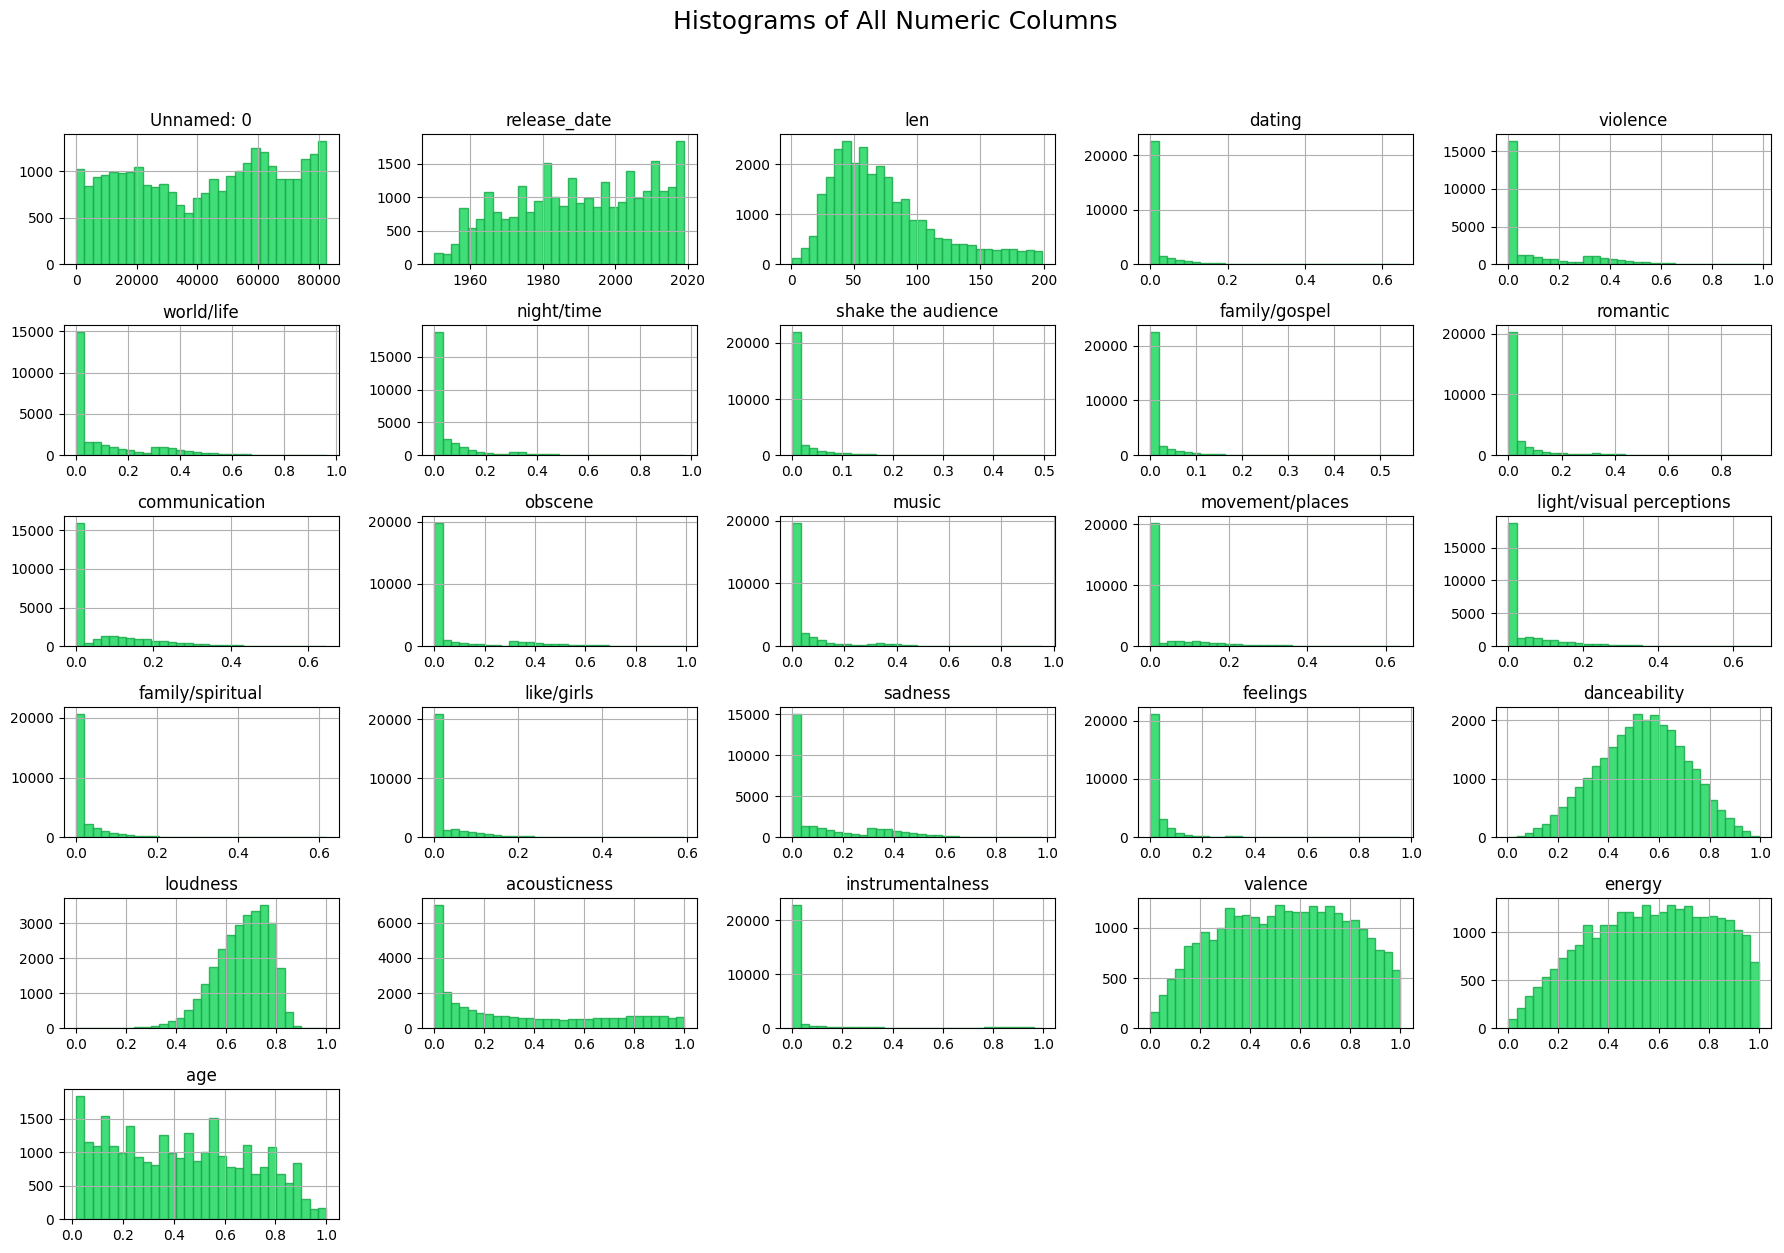

In [ ]:
df_main.select_dtypes(include='number').hist(bins=30, figsize=(18, 12), color='#1ed760', edgecolor='#1aab4b', alpha=0.85)
plt.suptitle("Histograms of All Numeric Columns", fontsize=18, y=1.04)
plt.tight_layout()
plt.show()

These graphs show that our data is not, very well distributed. Though we can still check the correlation of these numeric values on confirm the same.

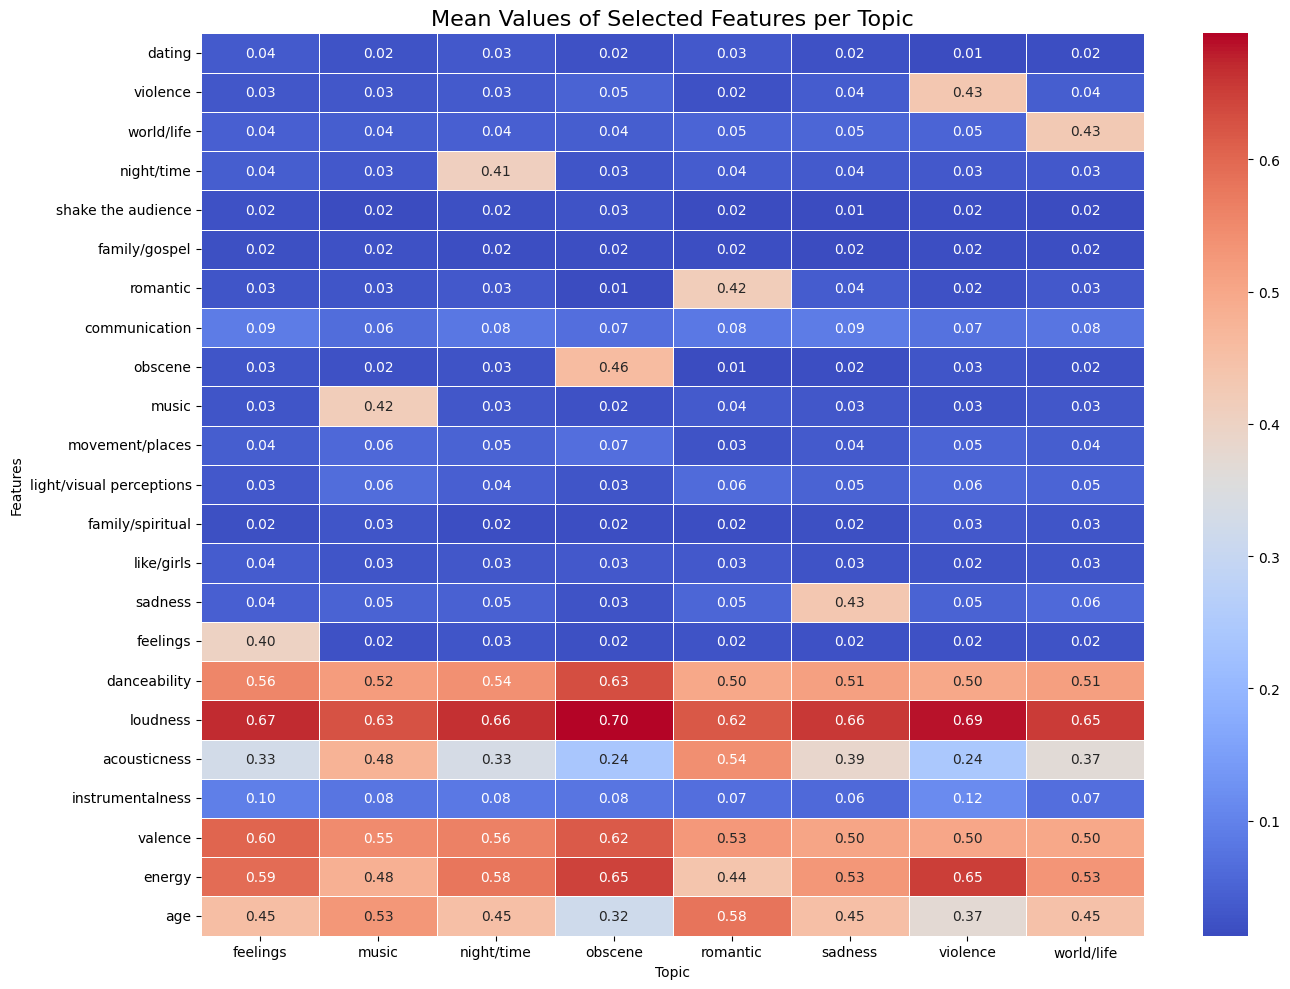

In [ ]:
features_of_interest = [
    'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
    'family/gospel', 'romantic', 'communication', 'obscene', 'music',
    'movement/places', 'light/visual perceptions', 'family/spiritual',
    'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
    'acousticness', 'instrumentalness', 'valence', 'energy', 'age'
]

group_means = df_main.groupby('topic')[features_of_interest].mean()

plt.figure(figsize=(14, 10))
sns.heatmap(group_means.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mean Values of Selected Features per Topic', fontsize=16)
plt.xlabel('Topic')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

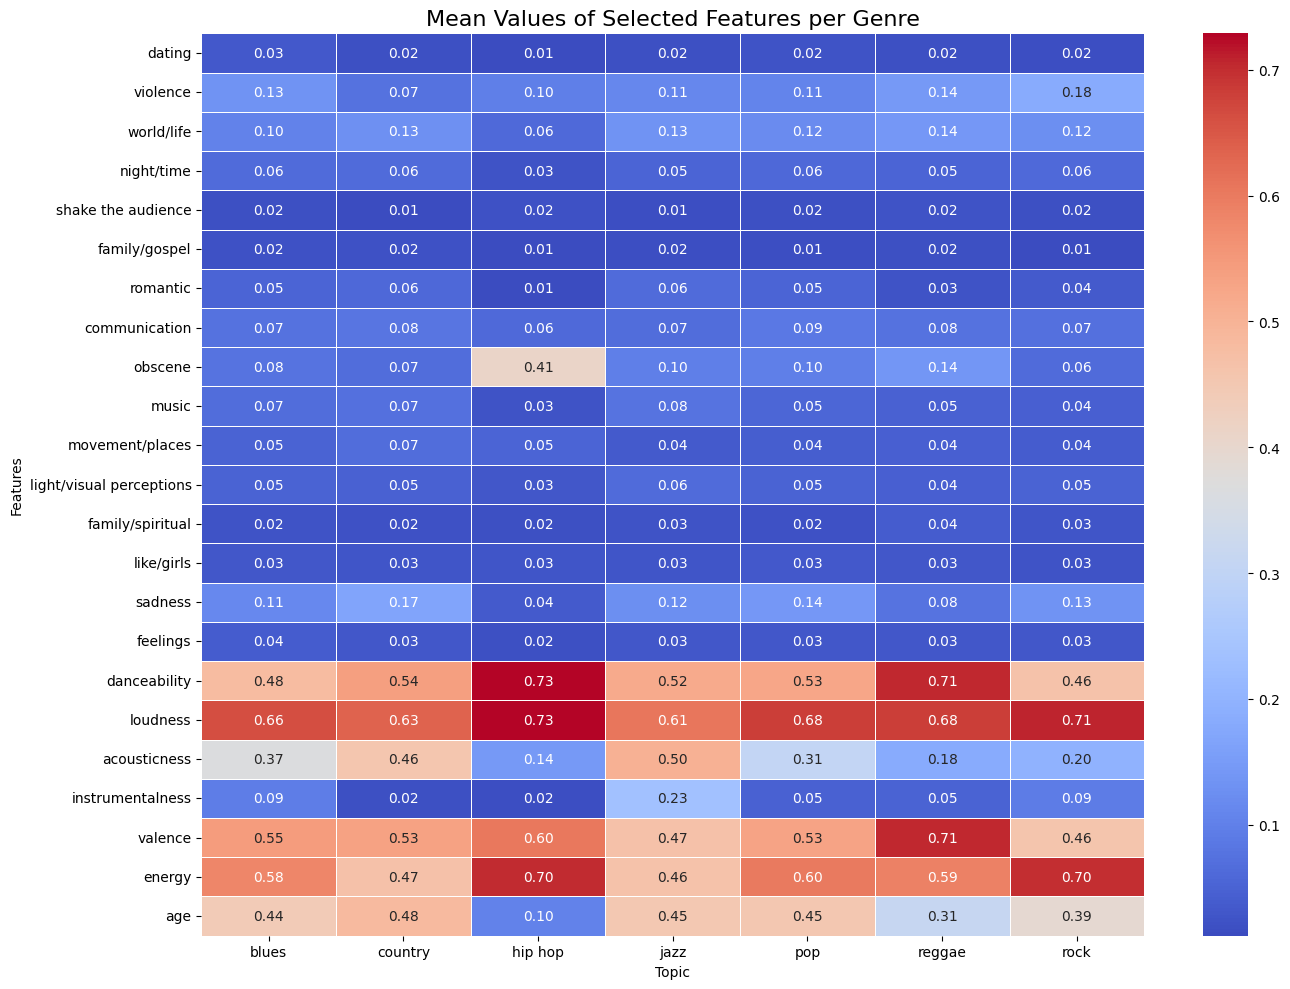

In [ ]:
features_of_interest = [
    'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
    'family/gospel', 'romantic', 'communication', 'obscene', 'music',
    'movement/places', 'light/visual perceptions', 'family/spiritual',
    'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
    'acousticness', 'instrumentalness', 'valence', 'energy', 'age'
]

group_means = df_main.groupby('genre')[features_of_interest].mean()

plt.figure(figsize=(14, 10))
sns.heatmap(group_means.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mean Values of Selected Features per Genre', fontsize=16)
plt.xlabel('Topic')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

These two above graphs prove that current used topics are mixture of different accoustic behaviour,and this something which is same for Artists defined genres also.

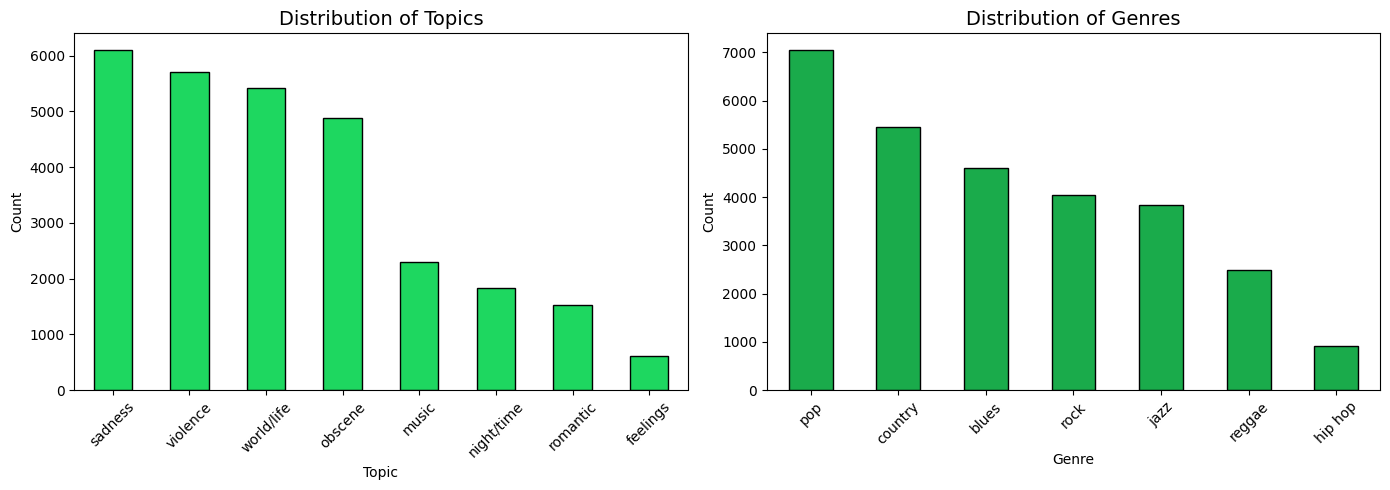

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Spotify-themed greens
topic_color = '#1ed760'
genre_color = '#1aab4b'

# Plot topic counts
df_main['topic'].value_counts().plot(
    kind='bar',
    ax=axes[0],
    color=topic_color,
    edgecolor='black'
)
axes[0].set_title('Distribution of Topics', color='black', fontsize=14)
axes[0].set_xlabel('Topic', color='black')
axes[0].set_ylabel('Count', color='black')
axes[0].tick_params(axis='x', rotation=45, colors='black')
axes[0].tick_params(axis='y', colors='black')

# Plot genre counts
df_main['genre'].value_counts().plot(
    kind='bar',
    ax=axes[1],
    color=genre_color,
    edgecolor='black'
)
axes[1].set_title('Distribution of Genres', color='black', fontsize=14)
axes[1].set_xlabel('Genre', color='black')
axes[1].set_ylabel('Count', color='black')
axes[1].tick_params(axis='x', rotation=45, colors='black')
axes[1].tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()


In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for genre vs topic
cramers = cramers_v(df_main['genre'], df_main['topic'])
print(f"Cramér's V between 'genre' and 'topic': {cramers:.3f}")

Cramér's V between 'genre' and 'topic': 0.150


Cramér's V between 'genre' and 'topic' is also not very high which means, there is no very strong correlation between atrist given genre and acoustic behaviour based topic. In the later stage we will try to merge these three together to get more Genres. (Wikipedia Contributors)



###**Step 3️⃣ : Text Cleaning & Preprocessing**

In [ ]:
#Creating copy for make it unharmed from preprocessing
df_clean = df_main.copy()
df_clean = df_clean.drop(columns=['Unnamed: 0', 'release_date', 'artist_name', 'track_name',
                                  'len', 'dating', 'violence', 'world/life', 'night/time',
                                  'shake the audience', 'family/gospel', 'romantic', 'communication',
                                  'obscene', 'music', 'movement/places', 'light/visual perceptions',
                                  'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
                                  'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age'])

In [ ]:
#@title ####***Step 1 & 2: Tokenization & Lowercasing***
def tokenize(text):
    doc = nlp(str(text))
    return [token.text for token in doc if token.is_alpha]

docs = nlp.pipe(df_clean['lyrics'].astype(str), batch_size=1000, n_process=-1)

df_clean['lyrics_tokens'] = [[token.text.lower() for token in doc if token.is_alpha] for doc in docs]

print("Before: ",df_main['lyrics'][15][0:460])
print("= "*150)
print("After: ",df_clean['lyrics_tokens'][15][0:460])

Before:  hahaha alright yeah alright even shoot complain things go want cliché life easy tough easy whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna thing dreamer think uncool preach better life learn school life live come life life easy tough life easy whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna s
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
After:  ['hahaha', 'alright', 'yeah', 'alright', 'even', 'shoot', 'complain', 'things', 'go', 'want', 'cliché', 'life', 'easy', 'tough', 'easy', 'whatcha', 'gon', 'na', 'whatcha', 'gon', 'na', 'smile', 'face', 'world', 'better', 

In [ ]:
#@title ###***Step 3. Removing Punktuation***
def remove_punctuation(tokens):
    return [token for token in tokens if token.isalpha()]

print("Before: ",df_main['lyrics'][15][0:460])
print("= "*150)
df_clean['lyrics_tokens'] = [remove_punctuation(tokens) for tokens in df_clean['lyrics_tokens']]
print("After: ",df_clean['lyrics_tokens'][15][0:460])

Before:  hahaha alright yeah alright even shoot complain things go want cliché life easy tough easy whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna thing dreamer think uncool preach better life learn school life live come life life easy tough life easy whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna s
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
After:  ['hahaha', 'alright', 'yeah', 'alright', 'even', 'shoot', 'complain', 'things', 'go', 'want', 'cliché', 'life', 'easy', 'tough', 'easy', 'whatcha', 'gon', 'na', 'whatcha', 'gon', 'na', 'smile', 'face', 'world', 'better', 

Why did you use lemmatizer or stemmer?

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner', 'textcat'])

# Prepare list of documents (strings) from token lists
texts = [' '.join(tokens) for tokens in df_clean['lyrics_tokens']]

lemmas_list = []
stems_list = []

# Batch process all texts with spaCy pipe
for doc in nlp.pipe(texts, batch_size=1000, n_process=-1):
    lemmas = []
    stems = []
    for token in doc:
        if token.is_alpha and not token.is_stop:
            lemmas.append(token.lemma_.lower())
            stems.append(stemmer.stem(token.text.lower()))
    lemmas_list.append(lemmas)
    stems_list.append(stems)

# Assign results back to dataframe
df_clean['lemmas'] = lemmas_list
df_clean['stems'] = stems_list

# Sample output prints
print("Before :", df_clean['lyrics_tokens'][15][0:460])
print("= " * 150)
print("After Lemmatizing :", df_clean['lemmas'][15][0:460])
print("= " * 150)
print("After Stemming :", df_clean['stems'][15][0:460])

Before : ['hahaha', 'alright', 'yeah', 'alright', 'even', 'shoot', 'complain', 'things', 'go', 'want', 'cliché', 'life', 'easy', 'tough', 'easy', 'whatcha', 'gon', 'na', 'whatcha', 'gon', 'na', 'smile', 'face', 'world', 'better', 'place', 'smile', 'face', 'whatcha', 'gon', 'na', 'whatcha', 'gon', 'na', 'smile', 'face', 'world', 'better', 'place', 'smile', 'face', 'whatcha', 'gon', 'na', 'whatcha', 'gon', 'na', 'thing', 'dreamer', 'think', 'uncool', 'preach', 'better', 'life', 'learn', 'school', 'life', 'live', 'come', 'life', 'life', 'easy', 'tough', 'life', 'easy', 'whatcha', 'gon', 'na', 'whatcha', 'gon', 'na', 'smile', 'face', 'world', 'better', 'place', 'smile', 'face', 'whatcha', 'gon', 'na', 'whatcha', 'gon', 'na', 'smile', 'face', 'world', 'better', 'place', 'smile', 'face', 'whatcha', 'gon', 'na', 'whatcha', 'gon', 'na', 'things', 'right', 'need', 'fighta', 'life', 'nicea', 'elders', 'polite', 'hurt', 'forget', 'smile', 'nation', 'small', 'good', 'reward', 'unite', 'stand', 'di

In [ ]:
def remove_words(list_of_tokens, list_of_words):
    return [token for token in list_of_tokens if token not in list_of_words]

def keep_proper_length_tokens(list_of_tokens):
    return [token for token in list_of_tokens if 2 < len(token) < 21]

# Remove stopwords
print("Before ",df_clean['lyrics_tokens'][1][0:460])
print("="*150)
df_clean['tokens_no_stopwords_lemmas'] = [remove_words(tokens, stop_words) for tokens in df_clean['lemmas']]
df_clean['tokens_no_stopwords_stems'] = [remove_words(tokens, stop_words) for tokens in df_clean['stems']]


# Remove too short/long tokens -- use correct column and function names
df_clean['tokens_filtered_lemmas'] = [keep_proper_length_tokens(tokens) for tokens in df_clean['tokens_no_stopwords_lemmas']]
df_clean['tokens_filtered_stems']  = [keep_proper_length_tokens(tokens) for tokens in df_clean['tokens_no_stopwords_stems']]

print("After on Lemmatized Tokens",df_clean['tokens_no_stopwords_lemmas'][1][0:460])
print("= "*150)
print("After on Stemmed Tokens",df_clean['tokens_no_stopwords_stems'][1][0:460])

Before  ['believe', 'drop', 'rain', 'fall', 'grow', 'believe', 'darkest', 'night', 'candle', 'glow', 'believe', 'go', 'astray', 'come', 'believe', 'believe', 'believe', 'smallest', 'prayer', 'hear', 'believe', 'great', 'hear', 'word', 'time', 'hear', 'bear', 'baby', 'touch', 'leaf', 'believe', 'believe', 'believe', 'lord', 'heaven', 'guide', 'sin', 'hide', 'believe', 'calvary', 'die', 'pierce', 'believe', 'death', 'rise', 'meet', 'heaven', 'loud', 'amen', 'know', 'believe']
After on Lemmatized Tokens ['believe', 'drop', 'rain', 'fall', 'grow', 'believe', 'darkest', 'night', 'candle', 'glow', 'believe', 'astray', 'come', 'believe', 'believe', 'believe', 'small', 'prayer', 'hear', 'believe', 'great', 'hear', 'word', 'time', 'hear', 'bear', 'baby', 'touch', 'leaf', 'believe', 'believe', 'believe', 'lord', 'heaven', 'guide', 'sin', 'hide', 'believe', 'calvary', 'die', 'pierce', 'believe', 'death', 'rise', 'meet', 'heaven', 'loud', 'amen', 'know', 'believe']
= = = = = = = = = = = = = = = = 

###**Step 4️⃣: Feature Extraction**

In [ ]:
df_fe = df_clean.copy()
to_be_removed = ['lyrics_tokens','lemmas','stems','tokens_no_stopwords_lemmas','tokens_no_stopwords_stems']
df_fe.drop(columns=to_be_removed, inplace=True)

In [ ]:
df_fe.head()

,genre,lyrics,topic,tokens_filtered_lemmas,tokens_filtered_stems
0,pop,hold time feel break feel untrue convince spea...,sadness,"[hold, time, feel, break, feel, untrue, convin...","[hold, time, feel, break, feel, untru, convinc..."
1,pop,believe drop rain fall grow believe darkest ni...,world/life,"[believe, drop, rain, fall, grow, believe, dar...","[believ, drop, rain, fall, grow, believ, darke..."
2,pop,sweetheart send letter goodbye secret feel bet...,music,"[sweetheart, send, letter, goodbye, secret, fe...","[sweetheart, send, letter, goodby, secret, fee..."
3,pop,kiss lips want stroll charm mambo chacha merin...,romantic,"[kiss, lip, want, stroll, charm, mambo, chacha...","[kiss, lip, want, stroll, charm, mambo, chacha..."
4,pop,till darling till matter know till dream live ...,romantic,"[till, darling, till, matter, know, till, drea...","[till, darl, till, matter, know, till, dream, ..."


Implementing TF-IDF (Non-Context Based Appraoch for Topic Modeling)

In [ ]:
df_fe['lyrics_stemmed_str'] = df_fe['tokens_filtered_stems'].apply(lambda x: ' '.join(x))
df_fe['lyrics_lemmatized_str'] = df_fe['tokens_filtered_lemmas'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()
X_stem = vectorizer.fit_transform(df_fe['lyrics_stemmed_str'])
X_lemma = vectorizer.fit_transform(df_fe['lyrics_lemmatized_str'])

###**Step 5️⃣ : Model Training & Evaluation**

Using TF-IDF with K-Means Clustering to check best possible

***Checking Silhouette Score for both Stemmized and Lemmatized Token. Later we will choose which approach to take basis on the Silhouette score.***

In [ ]:
def plot_kmeans_elbow_silhouette(X, k_min=2, k_max=10, title='KMeans: Elbow & Silhouette Scores',
                                 color_inertia='#1db954', color_silhouette='#191414'):
    inertias = []
    silhouettes = []
    k_values = range(k_min, k_max+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.plot(k_values, inertias, 'o-', color=color_inertia, label='Inertia (Elbow)')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia', color=color_inertia)
    ax1.tick_params(axis='y', labelcolor=color_inertia)
    ax1.grid(True, axis='x')

    ax2 = ax1.twinx()
    ax2.plot(k_values, silhouettes, 's-', color=color_silhouette, label='Silhouette')
    ax2.set_ylabel('Silhouette Score', color=color_silhouette)
    ax2.tick_params(axis='y', labelcolor=color_silhouette)

    plt.title(title)
    fig.tight_layout()
    plt.show()

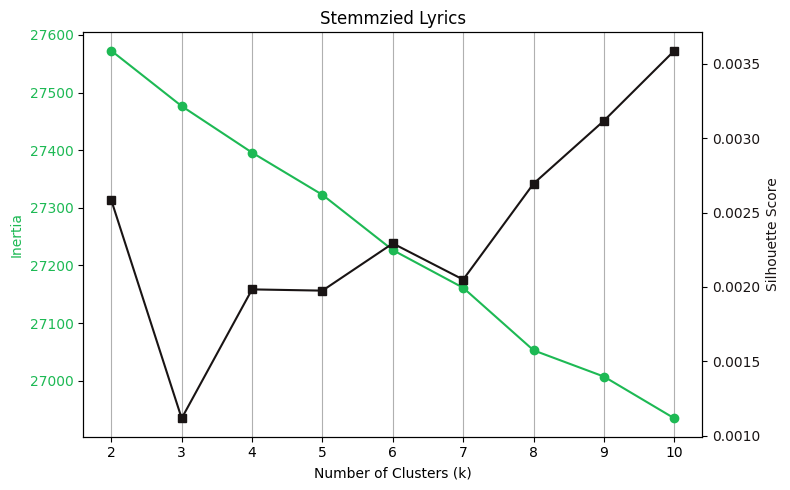

In [ ]:
plot_kmeans_elbow_silhouette(X_stem,k_min=2, k_max=10, title='Stemmzied Lyrics')

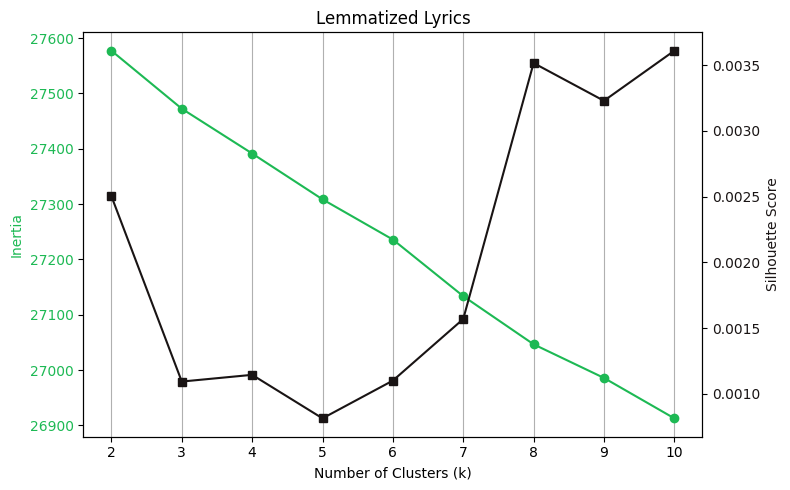

In [ ]:
plot_kmeans_elbow_silhouette(X_lemma,k_min=2, k_max=10, title='Lemmatized Lyrics')



> *Silhouette is almost same for with both Lemmatized and Stemmezied for most optimum K-Means clustter, therefore we will try to use different apporach to find out best cluster count.*



***Implementation of BERT model***

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast, light, and accurate


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
batch_size = 2000
texts = df_clean['tokens_filtered_lemmas'].apply(lambda tokens: ' '.join(tokens)).tolist()
X_bert_list = []

for start in range(0, len(texts), batch_size):
    end = min(start + batch_size, len(texts))
    print(f"Processing rows {start} to {end} ...")
    batch_vecs = model.encode(texts[start:end], show_progress_bar=True, batch_size=32)
    X_bert_list.append(batch_vecs)

X_bert = np.vstack(X_bert_list)
print("Final shape:", X_bert.shape)

Processing rows 0 to 2000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 2000 to 4000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 4000 to 6000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 6000 to 8000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 8000 to 10000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 10000 to 12000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 12000 to 14000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 14000 to 16000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 16000 to 18000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 18000 to 20000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 20000 to 22000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 22000 to 24000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 24000 to 26000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 26000 to 28000 ...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Processing rows 28000 to 28372 ...


Batches:   0%|          | 0/12 [00:00<?, ?it/s]

Final shape: (28372, 384)


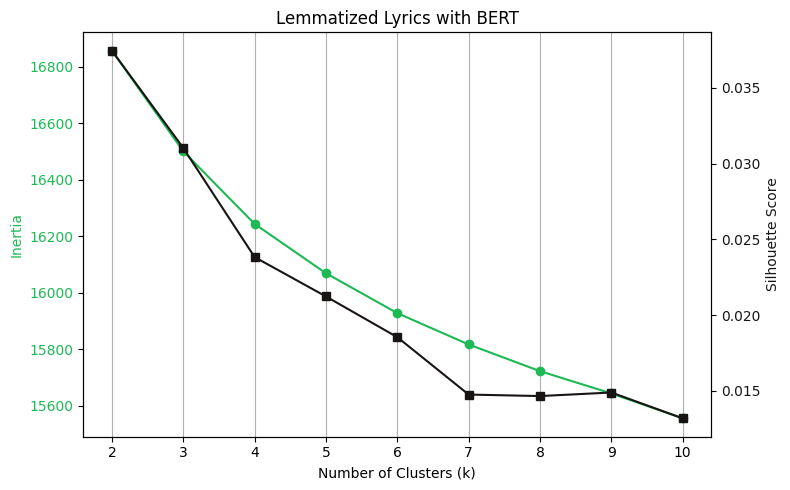

In [ ]:
plot_kmeans_elbow_silhouette(X_bert,k_min=2, k_max=10, title='Lemmatized Lyrics with BERT')

As we can see, for our lyrical data with TF-IDF it was more varied Silhouette score, but overall low Silhouette score. And with BERT it was high Silhouette score but less variation in it. At last we chose BERT since it gave good Silhouette score to do futrher modeling.

At last we are going ahead with a combination approach Latent Dirichlet Allocation

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=8, random_state=42)
lda_topics = lda.fit_transform(X_lemma)

In [ ]:
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]))


Topic 0:
blueberry lala santa concentrate mirage orchid breakaway reshape cottage carol
Topic 1:
christmas wonderland fascination unafraid winter dong snowman mistletoe peculiar sleigh
Topic 2:
goody cozy heartaches sleigh reborn godspeed jerusalem tumbleweed brimstone publish
Topic 3:
like fuck shit bitch nigga yeah niggas money cause know
Topic 4:
gyal babylon feat reggae zion waan paris lalala haffi selassie
Topic 5:
kiss sweet dream darling heart dear thrill blue arm true
Topic 6:
dearest tambourine moonglow solitaire hawaii jingle rugged levee aloha deride
Topic 7:
time know heart away come life feel like live leave


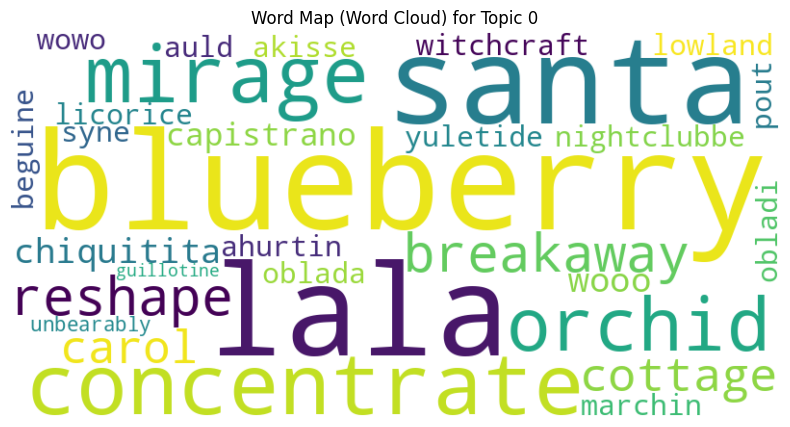

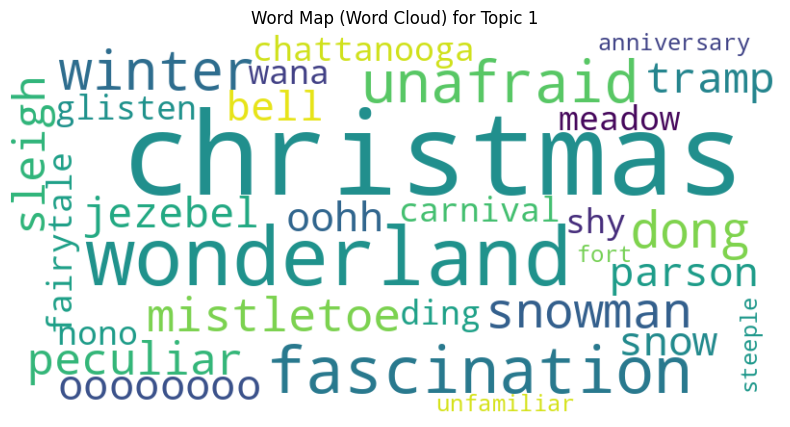

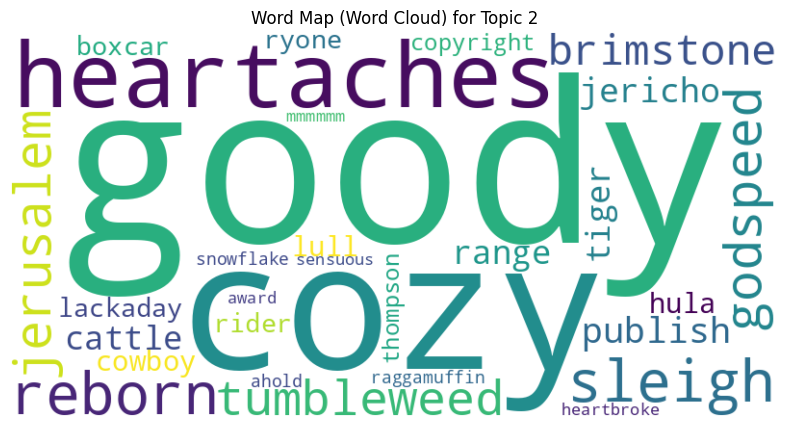

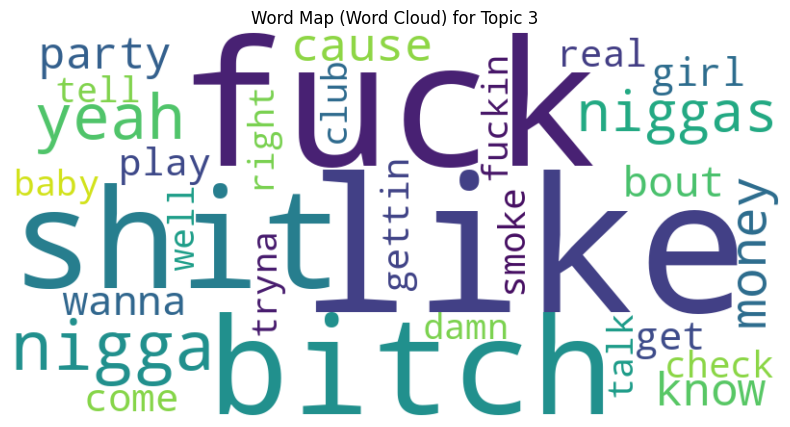

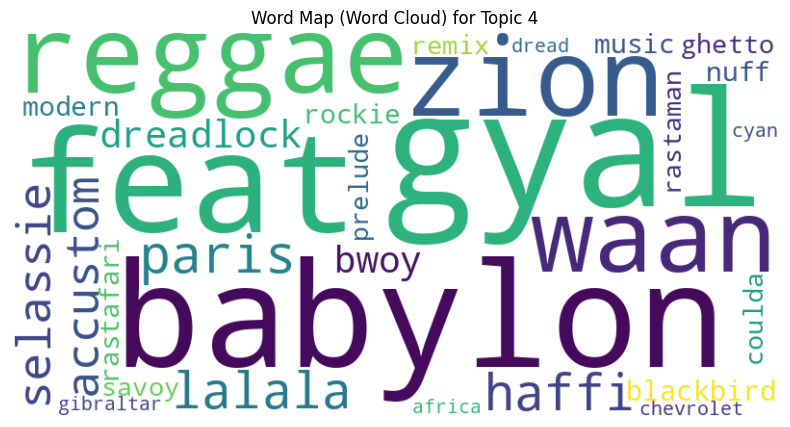

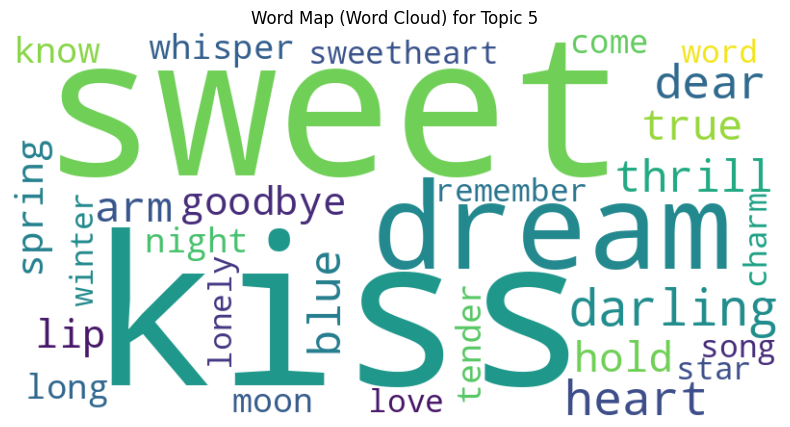

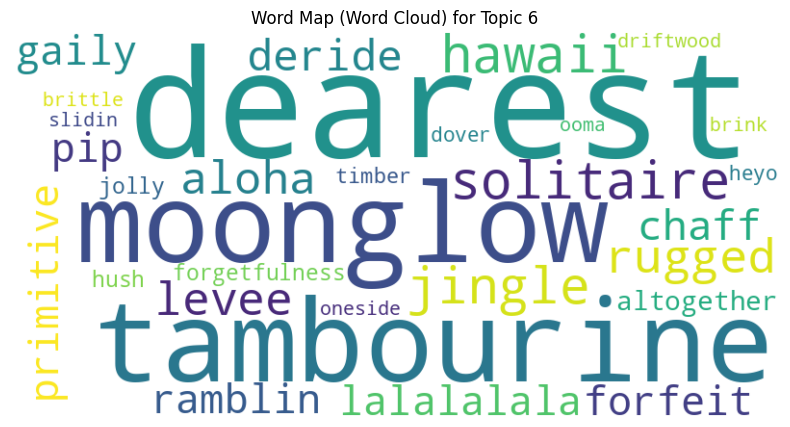

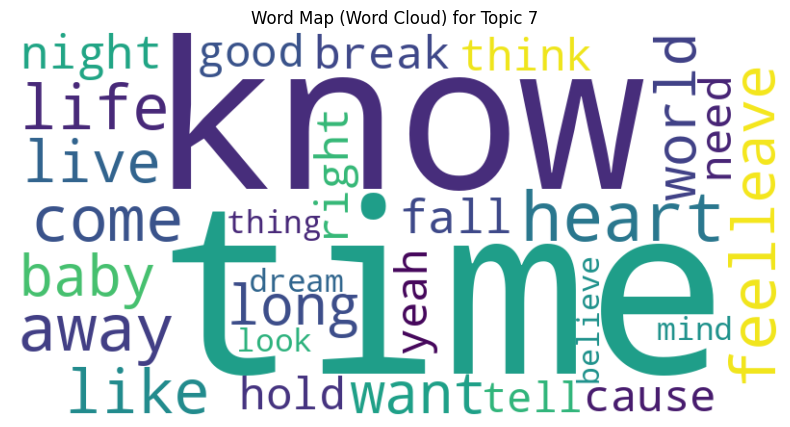

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

n_top_words = 30
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    word_weights = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words-1:-1]}
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Map (Word Cloud) for Topic {topic_idx}")
    plt.show()


**Interpretation of LDA Topic Word Maps**

After generating word clouds for each of the 8 topics, we assigned the following descriptive names based on the most frequent words in each cluster:

Topic 0: Surreal & Festive Motifs

***Top words: blueberry, mirage, santa, concentrate, lala, reshape, cottage, clubbe, breakaway***
This topic features dreamlike and festive words such as “mirage,” “santa,” and “yuletide,” evoking a whimsical or holiday atmosphere.

Topic 1: Christmas & Winter Themes

***Top words: christmas, winter, wonderland, bell, snow, sleigh, mistletoe, snowman, glisten***
This cluster clearly centers around winter and holiday-related words, suggesting a strong seasonal or festive theme.

Topic 2: Nostalgia & Comfort

***Top words: goody, cozy, heartaches, sleigh, jerusalem, godspeed, tumbleweed, boxcar***
The words here evoke warmth, journeys, and some elements of heartbreak or nostalgia.

Topic 3: Explicit / Party / Street Slang

***Top words: fuck, shit, like, bitch, nigga, party, yeah, girl, smoke, money***
This topic is dominated by explicit language and party slang, often found in street or club-themed music.

Topic 4: Reggae & Afro-Caribbean

***Top words: reggae, feat, babylon, gyal, zion, selassie, dreadlock, remix, bwoy, africa***
The vocabulary strongly reflects reggae and Afro-Caribbean culture and music references.

Topic 5: Love & Affection

***Top words: sweet, kiss, dream, darling, thrill, heart, goodbye, blue, arm, whisper***
This topic is centered around romantic and affectionate language, suggesting themes of love, tenderness, and longing.

Topic 6: Vintage & Exotic Imagery

***Top words: tambourine, dearest, moonglow, hawaii, aloha, jingle, solitaire, rugged, pip, gaily***
This cluster includes retro, dreamy, or tropical imagery—words like “hawaii,” “aloha,” “moonglow,” and “tambourine” create an exotic and nostalgic atmosphere.

Topic 7: Life, Time, & Reflection

***Top words: know, time, life, night, heart, thing, come, away, like, feel, live***
The dominant words in this topic relate to broad, existential themes such as time, life, emotion, and personal reflection.

In summary:
The topics discovered by LDA span a wide range—from holiday and party themes to romance, reggae, and introspective lyrics—highlighting the diversity of content present in the lyrics dataset.



In [ ]:
topic_names = {
    0: "Surreal & Festive Motifs",
    1: "Christmas & Winter Themes",
    2: "Nostalgia & Comfort",
    3: "Explicit / Party / Street Slang",
    4: "Reggae & Afro-Caribbean",
    5: "Love & Affection",
    6: "Vintage & Exotic Imagery",
    7: "Life, Time, & Reflection"
}

topic_nums = np.argmax(lda_topics, axis=1)  # topic index for each lyric


In [ ]:
df_main['topic_number'] = topic_nums
df_main['topic_name'] = df_main['topic_number'].map(topic_names)



#**Conclusion**

In [ ]:
df_main[['lyrics', 'genre','topic','topic_number', 'topic_name']].head()


,lyrics,genre,topic,topic_number,topic_name
0,hold time feel break feel untrue convince spea...,pop,sadness,7,"Life, Time, & Reflection"
1,believe drop rain fall grow believe darkest ni...,pop,world/life,7,"Life, Time, & Reflection"
2,sweetheart send letter goodbye secret feel bet...,pop,music,7,"Life, Time, & Reflection"
3,kiss lips want stroll charm mambo chacha merin...,pop,romantic,7,"Life, Time, & Reflection"
4,till darling till matter know till dream live ...,pop,romantic,7,"Life, Time, & Reflection"


In [ ]:
df_main['merged_genre_topic'] = df_main['genre'] + '_' + df_main['topic'] + '_' + df_main['topic_name']
df_main[['genre', 'topic', 'topic_name', 'merged_genre_topic']].head()

,genre,topic,topic_name,merged_genre_topic
0,pop,sadness,"Life, Time, & Reflection","pop_sadness_Life, Time, & Reflection"
1,pop,world/life,"Life, Time, & Reflection","pop_world/life_Life, Time, & Reflection"
2,pop,music,"Life, Time, & Reflection","pop_music_Life, Time, & Reflection"
3,pop,romantic,"Life, Time, & Reflection","pop_romantic_Life, Time, & Reflection"
4,pop,romantic,"Life, Time, & Reflection","pop_romantic_Life, Time, & Reflection"


In [ ]:
df_main['merged_genre_topic'].unique()

array(['pop_sadness_Life, Time, & Reflection',
       'pop_world/life_Life, Time, & Reflection',
       'pop_music_Life, Time, & Reflection',
       'pop_romantic_Life, Time, & Reflection',
       'pop_violence_Life, Time, & Reflection',
       'pop_world/life_Explicit / Party / Street Slang',
       'pop_obscene_Life, Time, & Reflection',
       'pop_night/time_Life, Time, & Reflection',
       'pop_obscene_Explicit / Party / Street Slang',
       'pop_music_Love & Affection',
       'pop_feelings_Life, Time, & Reflection',
       'pop_violence_Love & Affection',
       'pop_music_Explicit / Party / Street Slang',
       'pop_night/time_Reggae & Afro-Caribbean',
       'pop_romantic_Love & Affection',
       'pop_sadness_Christmas & Winter Themes',
       'pop_sadness_Explicit / Party / Street Slang',
       'pop_sadness_Surreal & Festive Motifs',
       'pop_sadness_Love & Affection',
       'pop_violence_Explicit / Party / Street Slang',
       'pop_music_Christmas & Winter Themes',

Through a combination of text preprocessing, clustering, and topic modeling on a diverse lyrics dataset, we explored the thematic structure of popular music across genres. Using methods like TF-IDF, Word2Vec, and BERT-based embeddings with both KMeans and HDBSCAN clustering, I found that:

- Lyrics data tends to be highly overlapping and diverse, making clear-cut clusters challenging to discover with classic KMeans.

- Silhouette scores were low for all methods, indicating substantial overlap between clusters and high semantic diversity in lyrics—this is typical for creative text like song lyrics.

Using LDA topic modeling, we uncovered a range of themes—from “Love & Affection” to “Reggae & Afro-Caribbean,” “Christmas & Winter Themes,” and “Explicit / Party / Street Slang.” These topic word maps provided interpretable insights and allowed me to assign every lyric a composite label combining genre, original topic, and topic model interpretation.

In summary:
While automated clustering of lyrics reveals only modest group separation, topic modeling successfully identifies meaningful thematic patterns in music. The resulting topic names and word clouds not only summarize key themes but also offer a foundation for deeper genre, mood, or era-based analysis.
This pipeline demonstrates both the strengths and limitations of unsupervised NLP on creative language, and shows that topic modeling remains a valuable tool for summarizing and interpreting large music lyric collections.



#**Refrences**



> Works CitedLi, You, et al. “Music Genre Classification Based on Fusing Audio and Lyric Information.” Multimedia Tools and Applications, 29 Dec. 2022, https://doi.org/10.1007/s11042-022-14252-6.


> Wikipedia Contributors. “Cramér’s V.” Wikipedia, Wikimedia Foundation, 14 Apr. 2020, en.wikipedia.org/wiki/Cram%C3%A9r%27s_V.

